In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 56890, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 56890 (delta 7), reused 24 (delta 0), pack-reused 56859
Receiving objects: 100% (56890/56890), 572.41 MiB | 28.46 MiB/s, done.
Resolving deltas: 100% (39325/39325), done.


In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/protoc.exe','/content/models/research')
shutil.copy('/content/drive/MyDrive/use_protobuf.py','/content/models/research')
shutil.copy('/content/drive/MyDrive/generate_tfrecord.py','/content/models/research/object_detection')
shutil.copy('/content/drive/MyDrive/xml_to_csv.py','/content/models/research/object_detection')
shutil.copy('/content/models/research/object_detection/packages/tf1/setup.py','/content/models/research')

'/content/models/research/setup.py'

In [ ]:
%cd /content/models/research
!python use_protobuf.py object_detection/protos protoc

/content/models/research


In [ ]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 358kB 10.8MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1650457 sha256=35c898e8b1ba64ee0fd16dff7ecf9ce47ead48937ba18e54c6644875651d8fa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-5c6rb5h4/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
Successfully built object-detection


In [ ]:
!python object_detection/builders/model_builder_tf1_test.py

Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[       OK ] ModelBuilderTF1Test.test_create_context_rcnn_from_config_with_params1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_experimental_model
[       OK ] ModelBuilderTF1Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature0 (True)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[       OK ] ModelBuilderTF1Test.test_create_faster_rcnn_from_config_with_crop_feature1 (False)
[ RUN      ] ModelBuilderTF1Test.test_create_faster_rcnn_model_from_config_w

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/images.zip", 'r')
zip_ref.extractall("/content/models/research/object_detection")
zip_ref.close()

In [ ]:
%cd object_detection/

/content/models/research/object_detection


In [ ]:
!python xml_to_csv.py

Successfully converted xml to csv.


In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record



W0506 05:53:38.557589 140613965195136 module_wrapper.py:139] From generate_tfrecord.py:91: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0506 05:53:39.250002 140613965195136 module_wrapper.py:139] From generate_tfrecord.py:50: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/object_detection/train.record


W0506 05:53:44.508310 140332778456960 module_wrapper.py:139] From generate_tfrecord.py:91: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0506 05:53:44.736027 140332778456960 module_wrapper.py:139] From generate_tfrecord.py:50: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/models/research/object_detection/test.record


In [ ]:
!unzip '/content/drive/MyDrive/tensorflow1/models.zip' -d '/content/drive/MyDrive/tensorflow1'

In [ ]:
%cd '/content/models/research/object_detection'
!mkdir training

/content/models/research/object_detection


In [ ]:
shutil.copy('/content/drive/MyDrive/label_map.pbtxt','/content/models/research/object_detection/training')

'/content/models/research/object_detection/training/label_map.pbtxt'

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz


--2021-05-06 05:55:37--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.206.128, 2a00:1450:400c:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.206.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M  67.1MB/s    in 2.1s    

2021-05-06 05:55:39 (67.1 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]



In [ ]:
!tar xf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

In [ ]:
fine tune = /content/models/research/object_detection/faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt
label map = /content/models/research/object_detection/training/label_map.pbtxt
input path train = /content/models/research/object_detection/train.record
input path test = /content/models/research/object_detection/test.record

In [ ]:
%cd /content/models/research/object_detection/
!mkdir inference_graph_10k

/content/models/research/object_detection


In [ ]:
!zip -r '/content/models.zip' '/content/models'

Streaming output truncated to the last 5000 lines.
  adding: content/models/research/object_detection/images/train/455.xml (deflated 47%)
  adding: content/models/research/object_detection/images/train/2229.xml (deflated 47%)
  adding: content/models/research/object_detection/images/train/3360.xml (deflated 47%)
  adding: content/models/research/object_detection/images/train/2417.jpg (deflated 1%)
  adding: content/models/research/object_detection/images/train/2476.xml (deflated 47%)
  adding: content/models/research/object_detection/images/train/414.jpg (deflated 1%)
  adding: content/models/research/object_detection/images/train/1497.jpg (deflated 3%)
  adding: content/models/research/object_detection/images/train/3074.jpg (deflated 0%)
  adding: content/models/research/object_detection/images/train/468.jpg (deflated 4%)
  adding: content/models/research/object_detection/images/train/3203.jpg (deflated 0%)
  adding: content/models/research/object_detection/images/train/2091.jpg (defl

In [ ]:
import shutil
shutil.copy('/content/models.zip','/content/drive/MyDrive/tensorflow1')

'/content/drive/MyDrive/tensorflow1/models.zip'

In [ ]:
%cd /content/models/research/object_detection/

!python model_main.py \
  --pipeline_config_path=faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config \
  --model_dir=training \
  --alsologtesderr

!python export_inference_graph.py \
  --pipeline_config_path=faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config \
  --trained_checkpoint_prefix=training \
  --output_directory=inference_graph_10k

while True:pass


/content/models/research/object_detection
W0503 05:30:05.781179 140001856866176 model_lib.py:812] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: None
I0503 05:30:05.781430 140001856866176 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0503 05:30:05.781569 140001856866176 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0503 05:30:05.781707 140001856866176 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0503 05:30:05.781873 140001856866176 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0503 05:30:05.782041 140001856866176 model_lib.py:828] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
INFO:tensorflow:create_estima

KeyboardInterrupt: ignored

anchor_generators/                               inference_graph_10k/
box_coders/                                      inference_graph_tembok/
builders/                                        __init__.py
colab_tutorials/                                 inputs.py
configs/                                         inputs_test.py
CONTRIBUTING.md                                  legacy/
core/                                            matchers/
data/                                            meta_architectures/
data_decoders/                                   metrics/
dataset_tools/                                   model_hparams.py
dockerfiles/                                     model_lib.py
eval_util.py                                     model_lib_tf1_test.py
eval_util_test.py                                model_lib_tf2_test.py
exporter_lib_tf2_test.py                         model_lib_v2.py
exporter_lib_v2.py                               model_main.py
exporter_main_v2.py             

In [ ]:
!python export_inference_graph.py \
  --pipeline_config_path=faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config \
  --trained_checkpoint_prefix=training/model.ckpt-10000 \
  --output_directory=inference_graph_tembok

Instructions for updating:
Please use `layer.__call__` method instead.
W0503 06:29:37.666678 140336720463744 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:2802: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:Scale of 0 disables regularizer.
I0503 06:29:39.485401 140336720463744 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.
I0503 06:29:39.656766 140336720463744 regularizers.py:99] Scale of 0 disables regularizer.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0503 06:29:39.657301 140336720463744 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0503 06:29:39.733362 140336720463744 deprecati

In [ ]:
!zip -r '/content/models/research/object_detection/inference_graph_tembok.zip' '/content/models/research/object_detection/inference_graph_tembok'

  adding: content/models/research/object_detection/inference_graph_tembok/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph_tembok/frozen_inference_graph.pb (deflated 9%)
  adding: content/models/research/object_detection/inference_graph_tembok/model.ckpt.data-00000-of-00001 (deflated 8%)
  adding: content/models/research/object_detection/inference_graph_tembok/checkpoint (deflated 42%)
  adding: content/models/research/object_detection/inference_graph_tembok/saved_model/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph_tembok/saved_model/saved_model.pb (deflated 9%)
  adding: content/models/research/object_detection/inference_graph_tembok/saved_model/variables/ (stored 0%)
  adding: content/models/research/object_detection/inference_graph_tembok/model.ckpt.meta (deflated 94%)
  adding: content/models/research/object_detection/inference_graph_tembok/model.ckpt.index (deflated 73%)
  adding: content/models/research/object_detec

In [ ]:
shutil.copy('/content/models/research/object_detection/inference_graph_tembok.zip','/content/drive/MyDrive')

'/content/drive/MyDrive/inference_graph_tembok.zip'

In [ ]:
!unzip '/content/drive/MyDrive/inference_graph.zip' -d '/content/models/research/object_detection'

Archive:  /content/drive/MyDrive/inference_graph.zip
   creating: /content/models/research/object_detection/inference_graph/
  inflating: /content/models/research/object_detection/inference_graph/faster_rcnn_inception_v2_custom_dataset.pbtxt  
  inflating: /content/models/research/object_detection/inference_graph/frozen_inference_graph.pb  


In [ ]:
%cd /content
# upload image from local computer to colab

from google.colab import files
from os import path

uploaded = files.upload()
  
for name, data in uploaded.items():
  with open('image1.jpg', 'wb') as f:
    f.write(data)
    f.close()
    print('saved file ' + name)

/content


Saving 2076.jpg to 2076.jpg
saved file 2076.jpg


/content/models/research/object_detection


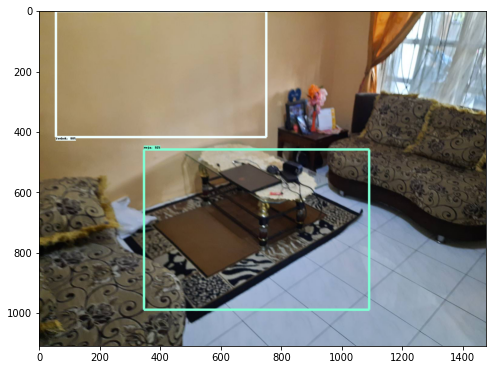

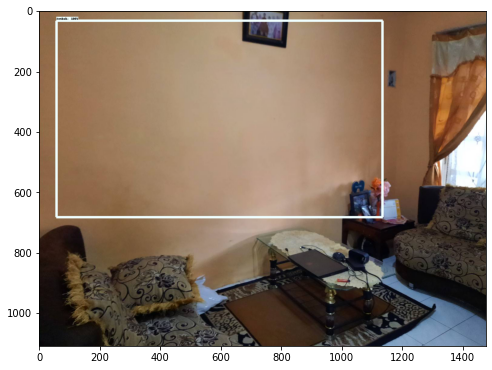

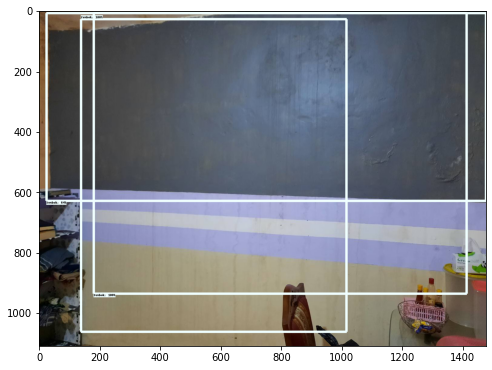

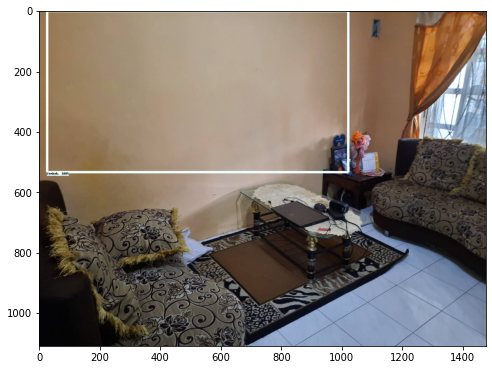

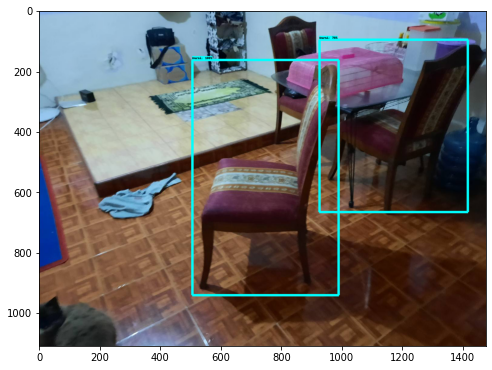

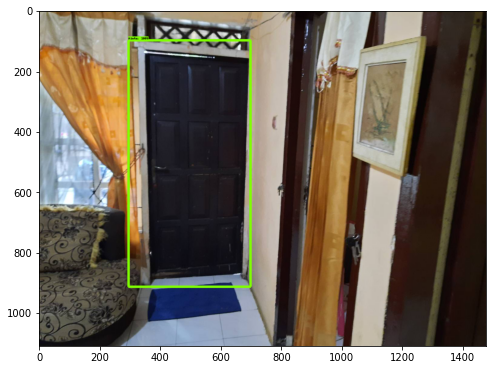

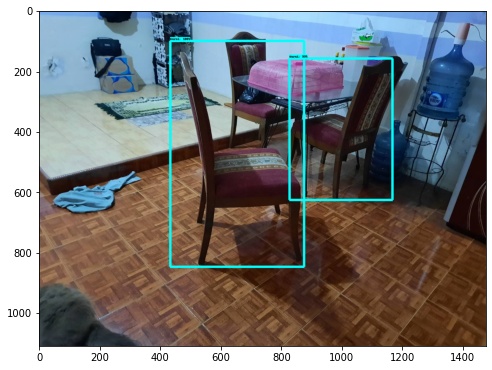

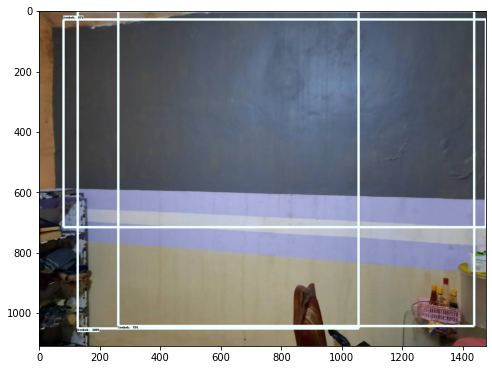

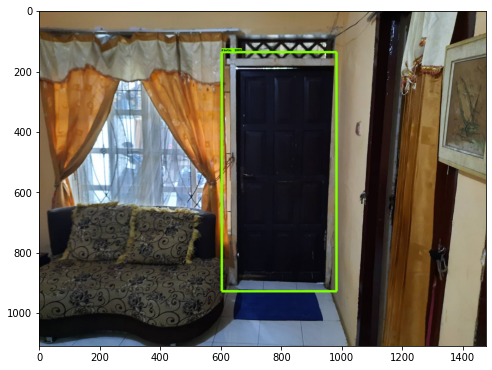

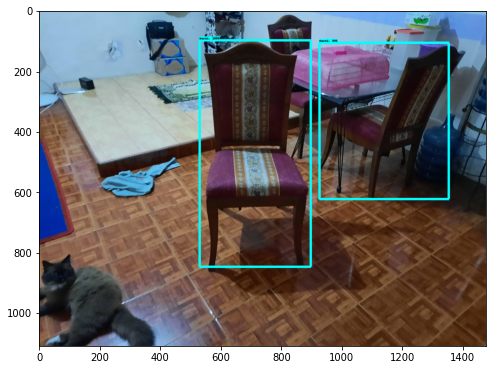

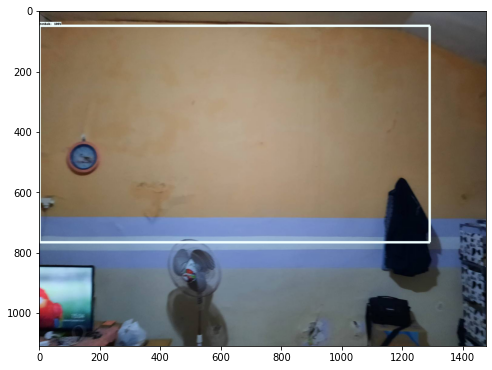

In [ ]:
%cd /content/models/research/object_detection

# [NOTE!] this sample implementation using Tensorflow ver 1.14

import os
import sys
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

from utils import label_map_util
from object_detection.utils import ops as utils_ops
from utils import visualization_utils as vis_util
import importlib
importlib.reload(vis_util)

# This is needed to display the images.
%matplotlib inline

# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/content/models/research/object_detection/inference_graph/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/models/research/object_detection/training/label_map.pbtxt'
NUM_CLASSES = 4 #[TODO!] change to number of training class

TEST_IMAGE_PATHS = [ os.path.join('/content/', 'image{}.jpg'.format(i)) for i in range(1, 2) ]
# Use images in test dir
IMAGE_DIR = os.path.join("/content/models/research/object_detection/test_images")
IMAGE_PATHS = []
for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_SIZE = (8, 17)

# load frozen inference graph
frcnn_graph = tf.Graph()
with frcnn_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
# load label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# PIL image to numpy array converter
def PIL_to_numpy(image):
  (w, h) = image.size

  return np.array(image.getdata()).reshape((h, w, 3)).astype(np.uint8)

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
          
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
                                      'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict


# -------------- main block --------------
for image_path in IMAGE_PATHS:
  # read image using PIL
  image = Image.open(image_path)
  image_np = PIL_to_numpy(image)

  # predict image
  output_dict = run_inference_for_single_image(image_np, frcnn_graph)

  # draw bousing box using `vis_util`
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  
  # show image
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)

/content/models/research/object_detection


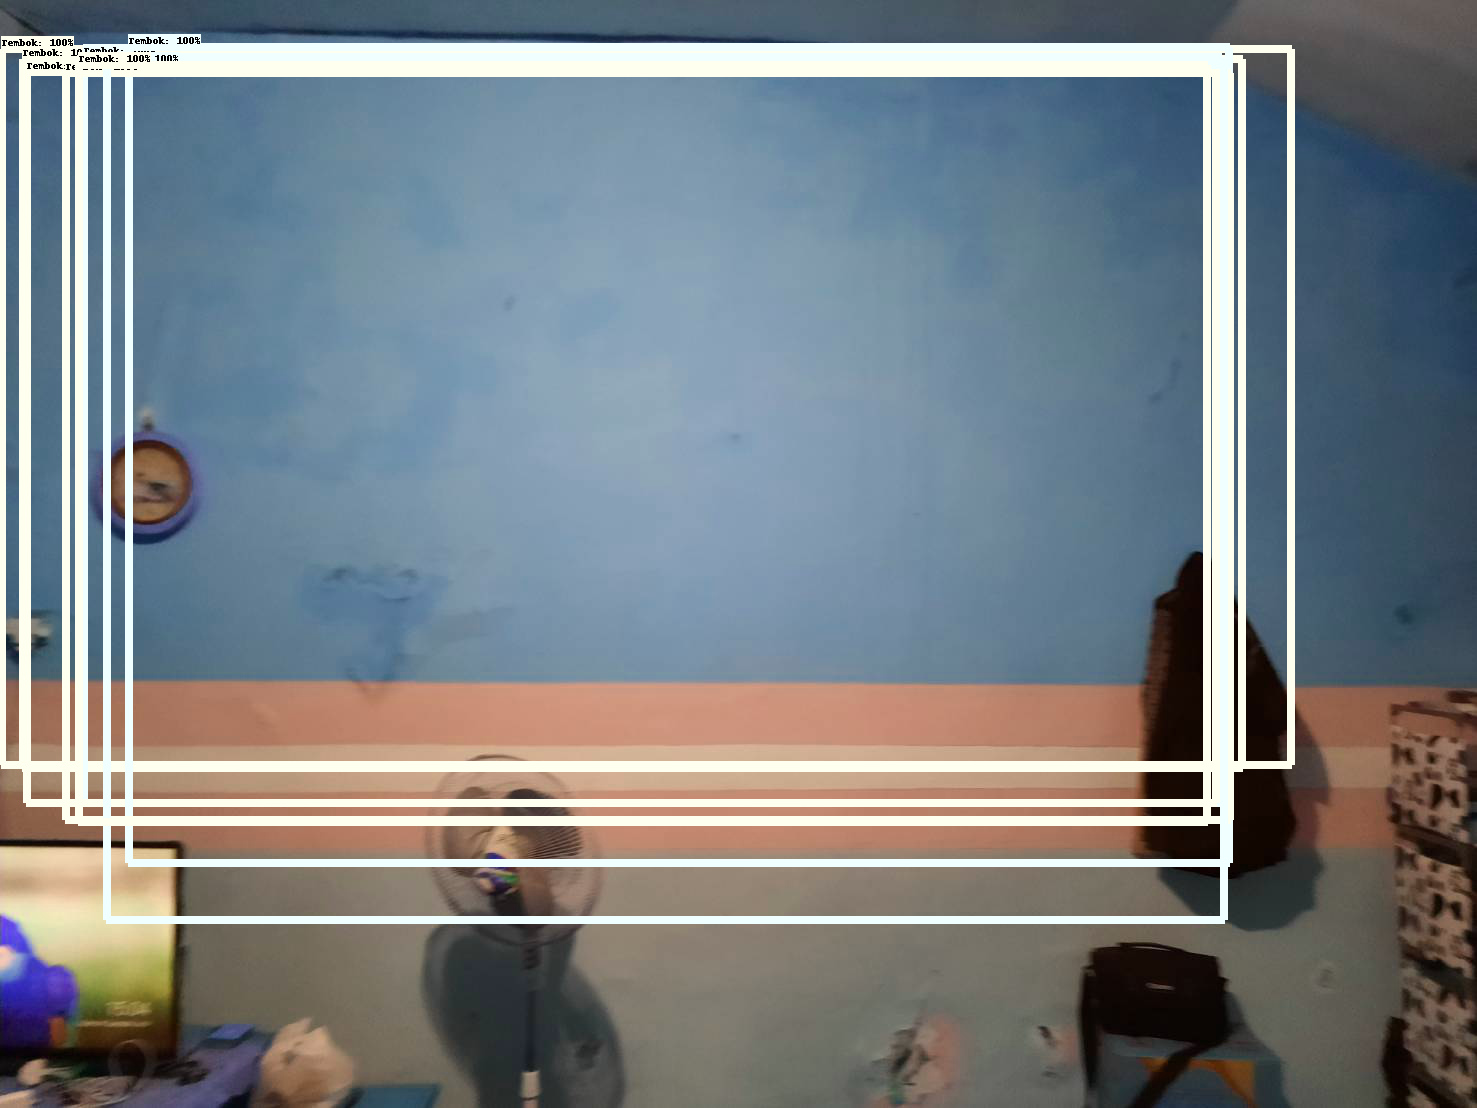

error: ignored

In [ ]:
%cd /content/models/research/object_detection

# [NOTE!] this sample implementation using Tensorflow ver 1.14

import os
import sys
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

from utils import label_map_util
from object_detection.utils import ops as utils_ops
from utils import visualization_utils as vis_util
import importlib
importlib.reload(vis_util)

# This is needed to display the images.
%matplotlib inline

# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/content/models/research/object_detection/inference_graph/frozen_inference_graph.pb'
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/models/research/object_detection/training/label_map.pbtxt'
NUM_CLASSES = 4 #[TODO!] change to number of training class

TEST_IMAGE_PATHS = [ os.path.join('/content/', 'image{}.jpg'.format(i)) for i in range(1, 2) ]
# Use images in test dir
IMAGE_DIR = os.path.join("/content/models/research/object_detection/test_images")
IMAGE_PATHS = []
for file in os.listdir(IMAGE_DIR):
    if file.endswith(".jpg") or file.endswith(".png"):
        IMAGE_PATHS.append(os.path.join(IMAGE_DIR, file))

IMAGE_SIZE = (8, 17)

# load frozen inference graph
frcnn_graph = tf.Graph()
with frcnn_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
# load label map
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# PIL image to numpy array converter
def PIL_to_numpy(image):
  (w, h) = image.size

  return np.array(image.getdata()).reshape((h, w, 3)).astype(np.uint8)

def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
          
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
                                      'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict


# -------------- main block --------------
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture(0)
while 1:
  _,img = cap.read()
  image_np = cv2.cvtColor(image_np,cv2.COLOR_BGR2RGB)
  output_dict = run_inference_for_single_image(image_np, frcnn_graph)
  #output_dict = cv2.cvtColor(output_dict,cv2.COLOR_RGB2BGR)
  # draw bousing box using `vis_util`
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  
  # show image

  cv2_imshow(image_np)
    

#     cv2.imshow('img',img)
  if cv2.waitKey(1) == ord('q'):
    break

  cap.release()
  cv2.destroyAllWindows()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


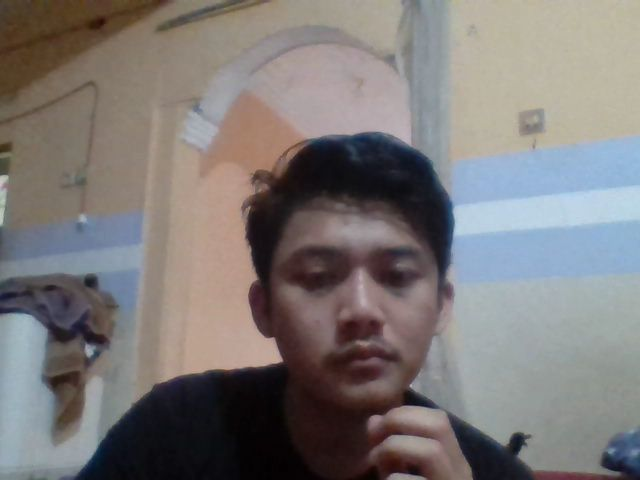

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import cv2 
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops
# This is needed to display the images.
%matplotlib inline

from utils import label_map_util

from utils import visualization_utils as vis_util

PATH_TO_FROZEN_GRAPH = '/content/models/research/object_detection/inference_graph/frozen_inference_graph.pb'
PATH_TO_LABELS = '/content/models/research/object_detection/training/label_map.pbtxt'


detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

def run_inference_for_single_image(image, graph):
    if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
    image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

    # Run inference
    output_dict = sess.run(tensor_dict,
                            feed_dict={image_tensor: np.expand_dims(image, 0)})

    # all outputs are float32 numpy arrays, so convert types as appropriate
    output_dict['num_detections'] = int(output_dict['num_detections'][0])
    output_dict['detection_classes'] = output_dict[
        'detection_classes'][0].astype(np.uint8)
    output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
    output_dict['detection_scores'] = output_dict['detection_scores'][0]
    if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

cap = cv2.VideoCapture(0)
try:
    with frcnn_graph.as_default():
        with tf.Session() as sess:
                # Get handles to input and output tensors
                ops = tf.get_default_graph().get_operations()
                all_tensor_names = {output.name for op in ops for output in op.outputs}
                tensor_dict = {}
                for key in [
                  'num_detections', 'detection_boxes', 'detection_scores',
                  'detection_classes', 'detection_masks'
                ]:
                    tensor_name = key + ':0'
                    if tensor_name in all_tensor_names:
                        tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                      tensor_name)

                while True:
                    ret, image_np = cap.read()
                    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                    image_np_expanded = np.expand_dims(image_np, axis=0)
                    # Actual detection.
                    output_dict = run_inference_for_single_image(image_np, detection_graph)
                    # Visualization of the results of a detection.
                    vis_util.visualize_boxes_and_labels_on_image_array(
                        image_np,
                        output_dict['detection_boxes'],
                        output_dict['detection_classes'],
                        output_dict['detection_scores'],
                        category_index,
                        instance_masks=output_dict.get('detection_masks'),
                        use_normalized_coordinates=True,
                        line_thickness=8)
                    cv2.imshow('object_detection', cv2.resize(image_np, (800, 600)))
                    if cv2.waitKey(25) & 0xFF == ord('q'):
                        cap.release()
                        cv2.destroyAllWindows()
                        break
except Exception as e:
    print(e)
    cap.release()

int() argument must be a string, a bytes-like object or a number, not 'NoneType'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
